# One vs One Analysis

In [13]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import math
import cv2

In [14]:
pose_3d_df = pd.read_csv('../1v1Data/test_3d.csv', index_col=0)
pose_arr = pose_3d_df.loc[:,'0':].values
print(pose_arr.shape)

(48, 48)


In [15]:
def plot3D(ax, points):
    ax.grid(False)
    oo = 1e10
    xmax,ymax,zmax = -oo,-oo,-oo
    xmin,ymin,zmin = oo, oo, oo
    edges = mpii_edges
    c='b'
    marker = 'o'
    points = points.reshape(-1, 3)
    x, y, z = np.zeros((3, points.shape[0]))
    for j in range(points.shape[0]):
        x[j] = points[j, 0].copy()
        y[j] = points[j, 2].copy()
        z[j] = -points[j, 1].copy()
        xmax = max(x[j], xmax)
        ymax = max(y[j], ymax)
        zmax = max(z[j], zmax)
        xmin = min(x[j], xmin)
        ymin = min(y[j], ymin)
        zmin = min(z[j], zmin)
    ax.scatter(x, y, z, s = 100, c = c, marker = marker)
    for e in edges:
        ax.plot(x[e], y[e], z[e], c = c)
    max_range = np.array([xmax-xmin, ymax-ymin, zmax-zmin]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(xmax+xmin)
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(ymax+ymin)
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(zmax+zmin)
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
        
def pose_to_matrix(pose):
    if len(pose) == 48:
        pose_matrix = pose.reshape(16, 3)
    else:
        pose_matrix = pose.reshape(16, 2)
    return pose_matrix

In [16]:
mpii_edges = [[0, 1], [1, 2], [2, 6], [6, 3], [3, 4], [4, 5], 
              [10, 11], [11, 12], [12, 8], [8, 13], [13, 14], [14, 15], 
              [6, 8], [8, 9]]

<IPython.core.display.Javascript object>


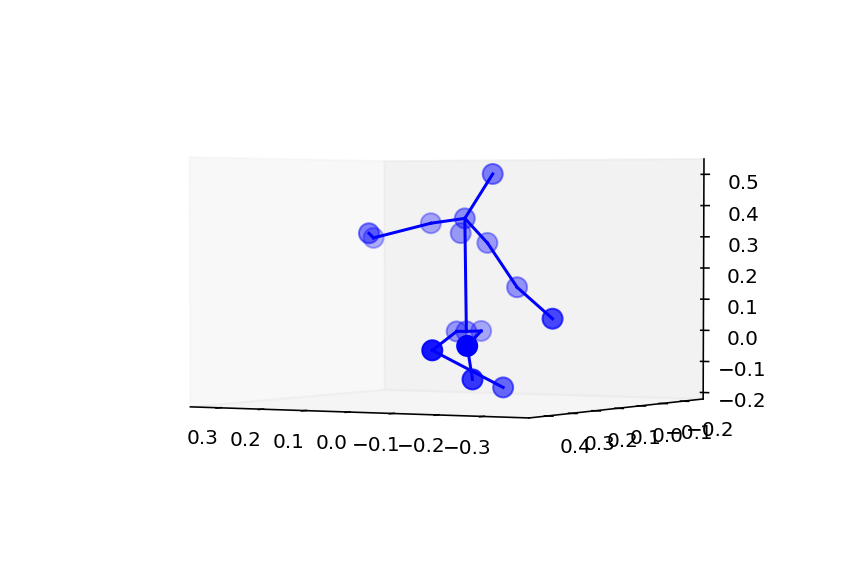

In [38]:
points = pose_to_matrix(pose_arr[37])
fig = plt.figure()
ax = fig.add_subplot((111),projection='3d')
plot3D(ax, points)
plt.show()

In [3]:
from sklearn.manifold import TSNE
tsne_embedded = TSNE(n_components=2).fit_transform(pose_arr)

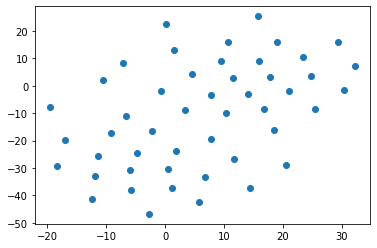

In [4]:
plt.scatter(tsne_embedded[:,0], tsne_embedded[:,1])
plt.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(pose_arr)

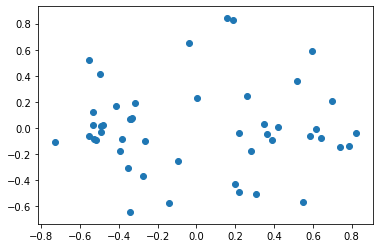

In [6]:
plt.scatter(pca[:,0], pca[:,1])
plt.show()

In [17]:
pca[[26, 25]]

array([[ 0.58531649, -0.06191912],
       [-0.52686389, -0.08037044]])